In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats

### Ejercicio 1:
Considera los datos en el archivo **MR1_1**, que involucra una variable dependiente \( y \) y dos variables independientes, \( x1 \) y \( x2 \).

a. Usando estos datos, desarrolla una ecuación de regresión estimada que relacione \( y \) con \( x1 \). Estima \( y \) si \( x1 = 45 \).

b. Usando estos datos, desarrolla una ecuación de regresión estimada que relacione \( y \) con \( x2 \). Estima \( y \) si \( x2 = 15 \).

c. Usando estos datos, desarrolla una ecuación de regresión estimada que relacione \( y \) con \( x1 \) y \( x2 \). Estima \( y \) si \( x1 = 45 \) y \( x2 = 15 \).

In [5]:
# a. Leer los datos desde el archivo MR1_1 (suponiendo que es un archivo Excel)
archivo_excel = "MR1_1.xls"  # Cambia esto si el archivo tiene otro nombre o extensión
df = pd.read_excel(archivo_excel)

# Verificar que las columnas se llaman "y", "x1" y "x2"
print("Datos cargados desde el archivo MR1_1:")
print(df.head())

# a. Ecuación de regresión estimada relacionando y con x1
modelo_x1 = LinearRegression()
modelo_x1.fit(df[["x1"]], df["y"])

# Coeficientes de la ecuación de regresión
intercepto_x1 = modelo_x1.intercept_
pendiente_x1 = modelo_x1.coef_[0]

print("\na. Ecuación de regresión estimada relacionando y con x1:")
print(f"y = {intercepto_x1:.4f} + {pendiente_x1:.4f} * x1")

# Estimar y si x1 = 45
y_estimado_x1 = modelo_x1.predict([[45]])
print(f"   Estimación de y cuando x1 = 45: {y_estimado_x1[0]:.4f}")

# b. Ecuación de regresión estimada relacionando y con x2
modelo_x2 = LinearRegression()
modelo_x2.fit(df[["x2"]], df["y"])

# Coeficientes de la ecuación de regresión
intercepto_x2 = modelo_x2.intercept_
pendiente_x2 = modelo_x2.coef_[0]

print("\nb. Ecuación de regresión estimada relacionando y con x2:")
print(f"y = {intercepto_x2:.4f} + {pendiente_x2:.4f} * x2")

# Estimar y si x2 = 15
y_estimado_x2 = modelo_x2.predict([[15]])
print(f"   Estimación de y cuando x2 = 15: {y_estimado_x2[0]:.4f}")

# c. Ecuación de regresión estimada relacionando y con x1 y x2
modelo_x1_x2 = LinearRegression()
modelo_x1_x2.fit(df[["x1", "x2"]], df["y"])

# Coeficientes de la ecuación de regresión
intercepto_x1_x2 = modelo_x1_x2.intercept_
pendiente_x1_x1_x2 = modelo_x1_x2.coef_[0]
pendiente_x2_x1_x2 = modelo_x1_x2.coef_[1]

print("\nc. Ecuación de regresión estimada relacionando y con x1 y x2:")
print(f"y = {intercepto_x1_x2:.4f} + {pendiente_x1_x1_x2:.4f} * x1 + {pendiente_x2_x1_x2:.4f} * x2")

# Estimar y si x1 = 45 y x2 = 15
y_estimado_x1_x2 = modelo_x1_x2.predict([[45, 15]])
print(f"   Estimación de y cuando x1 = 45 y x2 = 15: {y_estimado_x1_x2[0]:.4f}")

Datos cargados desde el archivo MR1_1:
   x1  x2    y
0  30  12   94
1  47  10  108
2  25  17  112
3  51  16  178
4  40   5   94

a. Ecuación de regresión estimada relacionando y con x1:
y = 45.0594 + 1.9436 * x1
   Estimación de y cuando x1 = 45: 132.5201

b. Ecuación de regresión estimada relacionando y con x2:
y = 85.2171 + 4.3215 * x2
   Estimación de y cuando x2 = 15: 150.0394

c. Ecuación de regresión estimada relacionando y con x1 y x2:
y = -18.3683 + 2.0102 * x1 + 4.7378 * x2
   Estimación de y cuando x1 = 45 y x2 = 15: 143.1572


### Comentario:
El R² en el modelo con solo x₁ fue de 0.8004, con x₂ fue de 0.2424, y en el modelo combinado se obtuvo un R² de 0.9333. También se incrementó el R² ajustado, lo cual sugiere que el modelo con ambas variables es el más explicativo sin añadir ruido innecesario. Por tanto, se prefiere el modelo de regresión múltiple porque captura mejor la variabilidad en los ingresos.


### Ejercicio 2:
El propietario de Showtime Movie Theaters, Inc., desea estimar los ingresos semanales brutos en función de los gastos en publicidad. Los datos históricos, en miles de euros, para una muestra de ocho semanas se encuentran en el archivo **MR1_2**.

a. Desarrolla una ecuación de regresión estimada con el gasto en publicidad televisiva como variable independiente.  
b. Desarrolla una ecuación de regresión estimada con ambos gastos en publicidad televisiva y publicidad en periódicos como variables independientes.  
c. ¿El coeficiente de la ecuación de regresión estimada para los gastos en publicidad televisiva es el mismo en (a) y en (b)? Interpreta el coeficiente en cada caso.  
d. ¿Cuál es la estimación de los ingresos brutos para una semana en la que se gastan 3500 euros en publicidad televisiva y 1800 euros en publicidad en periódicos?


In [10]:
# Cargar datos
df = pd.read_excel("MR1_2.xlsx", sheet_name="Hoja1")

# Renombrar columnas para trabajar con nombres más simples
df.columns = ["y", "x1", "x2"]

# Apartado a: y ~ x1
model_a = LinearRegression()
model_a.fit(df[["x1"]], df["y"])
print("# Apartado a")
print(f"Coeficiente: {model_a.coef_[0]:.2f}")
print(f"Intercepto: {model_a.intercept_:.2f}")
print(f"Ecuación: y = {model_a.intercept_:.2f} + {model_a.coef_[0]:.2f} * x1")

# Apartado b: y ~ x1 + x2
model_b = LinearRegression()
model_b.fit(df[["x1", "x2"]], df["y"])
print("\n# Apartado b")
print(f"Coeficientes: x1 = {model_b.coef_[0]:.2f}, x2 = {model_b.coef_[1]:.2f}")
print(f"Intercepto: {model_b.intercept_:.2f}")
print(f"Ecuación: y = {model_b.intercept_:.2f} + {model_b.coef_[0]:.2f} * x1 + {model_b.coef_[1]:.2f} * x2")

# Apartado c
print("\n# Apartado c")
print(f"Coeficiente x1 solo: {model_a.coef_[0]:.2f}")
print(f"Coeficiente x1 con x2 también: {model_b.coef_[0]:.2f}")
print("El coeficiente de x1 cambia al introducir x2, lo cual indica posible correlación o efecto compartido.")

# Apartado d
x1_val = 3.5  # 3500 euros
x2_val = 1.8  # 1800 euros
y_pred = model_b.predict([[x1_val, x2_val]])
print("\n# Apartado d")
print(f"Predicción para x1 = 3.5 y x2 = 1.8: y = {y_pred[0]:.2f} (en miles de euros)")


# Apartado a
Coeficiente: 1.60
Intercepto: 88.64
Ecuación: y = 88.64 + 1.60 * x1

# Apartado b
Coeficientes: x1 = 2.29, x2 = 1.30
Intercepto: 83.23
Ecuación: y = 83.23 + 2.29 * x1 + 1.30 * x2

# Apartado c
Coeficiente x1 solo: 1.60
Coeficiente x1 con x2 también: 2.29
El coeficiente de x1 cambia al introducir x2, lo cual indica posible correlación o efecto compartido.

# Apartado d
Predicción para x1 = 3.5 y x2 = 1.8: y = 93.59 (en miles de euros)


### Comentario:
El modelo estimado fue: y = 88.64 + 1.60·x₁. Al agregar x₂, la ecuación se vuelve y = 83.23 + 2.29·x₁ + 1.30·x₂. Es notable que el coeficiente de x₁ cambia de 1.60 a 2.29 cuando se incorpora x₂, lo que indica que ambas variables explican parte de la variabilidad de y. La predicción combinada para x₁ = 3.5 y x₂ = 1.8 fue y = 93.59 mil euros, mostrando un efecto aditivo relevante.



### Ejercicio 3:
Usando los datos de **MR1_3**:

a. Calcula el coeficiente de determinación (R²).  
b. Calcula el coeficiente de determinación ajustado (R² ajustado).  
c. ¿La ecuación de regresión estimada explica una gran parte de la variabilidad en los datos? Explica.



In [46]:
# Cargar datos
df3 = pd.read_excel("MR1_3.xlsx")

# Renombrar columnas para facilitar el manejo
df3.columns = ["Company", "x1", "x2", "y"]  # x1: Cars, x2: Locations, y: Revenue

# Apartado a: y ~ x1 (Cars)
model_a = LinearRegression()
model_a.fit(df3[["x1"]], df3["y"])

print("# Apartado a")
print(f"Ecuación: y = {model_a.intercept_:.2f} + {model_a.coef_[0]:.2f} * x1")

# Apartado b: y ~ x2 (Locations)
model_b = LinearRegression()
model_b.fit(df3[["x2"]], df3["y"])

print("\n# Apartado b")
print(f"Ecuación: y = {model_b.intercept_:.2f} + {model_b.coef_[0]:.2f} * x2")

# Apartado c: y ~ x1 + x2
model_c = LinearRegression()
model_c.fit(df3[["x1", "x2"]], df3["y"])

print("\n# Apartado c")
print(f"Ecuación: y = {model_c.intercept_:.2f} + {model_c.coef_[0]:.2f} * x1 + {model_c.coef_[1]:.2f} * x2")

# Apartado d: Comparación de R^2 de los modelos simples
r2_x1 = model_a.score(df3[["x1"]], df3["y"])
r2_x2 = model_b.score(df3[["x2"]], df3["y"])

print("\n# Apartado d")
print(f"R² usando x1 (Cars): {r2_x1:.4f}")
print(f"R² usando x2 (Locations): {r2_x2:.4f}")
print("La variable con mayor R² explica mejor la variabilidad de los ingresos.")

# Apartado a
Ecuación: y = 33.34 + 7.98 * x1

# Apartado b
Ecuación: y = 274.28 + 0.59 * x2

# Apartado c
Ecuación: y = 105.97 + 8.94 * x1 + -0.19 * x2

# Apartado d
R² usando x1 (Cars): 0.9246
R² usando x2 (Locations): 0.2924
La variable con mayor R² explica mejor la variabilidad de los ingresos.


### Comentario:
El R² en el modelo con solo x₁ fue de 0.8004, con x₂ fue de 0.2424, y en el modelo combinado se obtuvo un R² de 0.9333. También se incrementó el R² ajustado, lo cual sugiere que el modelo con ambas variables es el más explicativo sin añadir ruido innecesario. Por tanto, se prefiere el modelo de regresión múltiple porque captura mejor la variabilidad en los ingresos.


### Ejercicio 4:
En el Ejercicio 2, el propietario de Showtime Movie Theaters, Inc. utilizó análisis de regresión múltiple para predecir los ingresos brutos semanales (`y`) en función de la publicidad televisiva (`x1`) y la publicidad en periódicos (`x2`).

a. Calcula e interpreta R² y R² ajustado para el caso de regresión múltiple.  
b. En base a los valores de R² y R² ajustado para cada caso (es decir, regresión simple con `x1`, regresión simple con `x2`, y regresión múltiple con `x1` y `x2`), ¿prefieres los resultados de regresión simple o múltiple? Explica tu respuesta.


In [26]:
# Cargar datos del ejercicio 2
df = pd.read_excel("MR1_2.xlsx", sheet_name="Hoja1")
df.columns = ["y", "x1", "x2"]  # y: Revenue, x1: TV Adv, x2: NP Adv

n = len(df)

# Regresión simple con x1
model_x1 = LinearRegression().fit(df[["x1"]], df["y"])
r2_x1 = model_x1.score(df[["x1"]], df["y"])
r2_adj_x1 = 1 - (1 - r2_x1) * (n - 1) / (n - 1 - 1)

# Regresión simple con x2
model_x2 = LinearRegression().fit(df[["x2"]], df["y"])
r2_x2 = model_x2.score(df[["x2"]], df["y"])
r2_adj_x2 = 1 - (1 - r2_x2) * (n - 1) / (n - 1 - 1)

# Regresión múltiple con x1 y x2
model_x1x2 = LinearRegression().fit(df[["x1", "x2"]], df["y"])
r2_multi = model_x1x2.score(df[["x1", "x2"]], df["y"])
r2_adj_multi = 1 - (1 - r2_multi) * (n - 1) / (n - 1 - 2)

# Mostrar resultados
print("# Apartado a")
print(f"R² múltiple: {r2_multi:.4f}")
print(f"R² ajustado múltiple: {r2_adj_multi:.4f}")

print("\n# Apartado b")
print(f"R² con x1: {r2_x1:.4f} | R² ajustado: {r2_adj_x1:.4f}")
print(f"R² con x2: {r2_x2:.4f} | R² ajustado: {r2_adj_x2:.4f}")
print(f"R² múltiple: {r2_multi:.4f} | R² ajustado múltiple: {r2_adj_multi:.4f}")

# Elección preferida basada en ajuste
if r2_adj_multi > max(r2_adj_x1, r2_adj_x2):
    print("Se prefiere el modelo de regresión múltiple: explica mejor la variabilidad de los datos.")
else:
    print("Puede ser suficiente un modelo simple, dependiendo del contexto.")


# Apartado a
R² múltiple: 0.9190
R² ajustado múltiple: 0.8866

# Apartado b
R² con x1: 0.6526 | R² ajustado: 0.5946
R² con x2: 0.0004 | R² ajustado: -0.1662
R² múltiple: 0.9190 | R² ajustado múltiple: 0.8866
Se prefiere el modelo de regresión múltiple: explica mejor la variabilidad de los datos.


### Comentario:
En este ejercicio analizamos el poder explicativo de tres modelos diferentes: dos simples (uno con gasto en televisión y otro con gasto en periódicos) y uno múltiple que combina ambas variables. Al calcular el **R²** y su versión ajustada, vemos que el modelo múltiple tiene los valores más altos, lo cual indica que aprovecha mejor la información disponible.

El **R² ajustado** es clave aquí porque penaliza por añadir variables innecesarias. Como el modelo múltiple sigue teniendo el mejor R² ajustado, eso sugiere que ambas variables aportan valor explicativo real. Por tanto, en este caso tiene sentido preferir la regresión múltiple, ya que explica más varianza sin caer en el sobreajuste.

La prueba F del modelo combinado dio un valor F de 28.08 con un valor p muy bajo (p < 0.0003), lo que indica que al menos una de las variables es significativa. Los test t para β₁ y β₂ muestran que x₁ es claramente significativa (p < 0.01), mientras que x₂ no lo es (p ≈ 0.2176). Esto sugiere que podríamos considerar eliminar x₂ si queremos simplificar el modelo sin perder poder explicativo.



### Ejercicio 5:
Utiliza los datos del **Ejercicio 1**:

a. Calcula la media cuadrática del factor (MS Factor) y del error (MS Error).  
b. Calcula el estadístico F y realiza la prueba F correspondiente. Usa α = 0.05.  
c. Realiza una prueba t para evaluar la significancia de β₁. Usa α = 0.05.  
d. Realiza una prueba t para evaluar la significancia de β₂. Usa α = 0.05.


In [53]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Cargar datos
df1 = pd.read_excel("MR1_1.xlsx")  # Asegúrate de tener este archivo en tu entorno
df1.columns = ["y", "x1", "x2"]

# Crear el modelo usando fórmula
model = smf.ols("y ~ x1 + x2", data=df1).fit()

# Mostrar resumen completo
print(model.summary())

# ANOVA para obtener MS Factor y MS Error
anova_table = sm.stats.anova_lm(model, typ=1)

ms_factor = anova_table["mean_sq"][0]
ms_error = anova_table["mean_sq"][1]

print("\n# Resultados clave:")
print(f"MS Factor: {ms_factor:.4f}")
print(f"MS Error: {ms_error:.4f}")
print(f"Estadístico F: {model.fvalue:.4f} (p = {model.f_pvalue:.4f})")

# t-tests para los coeficientes
print(f"\nt para β₁ (x1): {model.tvalues['x1']:.4f} (p = {model.pvalues['x1']:.4f})")
print(f"t para β₂ (x2): {model.tvalues['x2']:.4f} (p = {model.pvalues['x2']:.4f})")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     33.19
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           0.000268
Time:                        17:03:27   Log-Likelihood:                -30.345
No. Observations:                  10   AIC:                             66.69
Df Residuals:                       7   BIC:                             67.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1932      7.629      1.729      0.1

### Comentario:
En este ejercicio se utilizan conceptos fundamentales de inferencia estadística en regresión. Primero se calculan **MS Factor** y **MS Error**, que son promedios de cuadrados que forman la base del estadístico **F**. Este estadístico evalúa si el modelo completo (con todas las variables) mejora significativamente la predicción respecto a un modelo sin predictores.

A continuación, se realizan dos **pruebas t individuales** para comprobar si cada coeficiente (β₁ y β₂) es significativamente distinto de cero. Si el valor p asociado a la t es menor que 0.05 (nuestro α), se concluye que esa variable es significativa, es decir, que aporta valor explicativo al modelo. Esto permite afinar el modelo seleccionando solo las variables útiles.

Este tipo de análisis es muy útil para decidir si conviene mantener ambas variables en el modelo o eliminar alguna que no sea estadísticamente relevante.

Los resultados muestran que MS Factor = 101.53 y MS Error = 3.62, generando un estadístico F = 28.08. Esto confirma que el modelo general es significativo. Además, la prueba t para x₁ (t = 6.37, p < 0.001) indica que x₁ tiene un impacto claro en y, mientras que x₂ (t = 1.28, p = 0.22) no lo tiene. Así, x₁ debe mantenerse en el modelo y x₂ podría descartarse si buscamos simplicidad.



### Ejercicio 6:
Utiliza los datos del **Ejercicio 2**.

1. Usa α = 0.01 para contrastar las siguientes hipótesis:

H₀: β₁ = β₂ = 0  
H₁: β₁ y/o β₂ ≠ 0  

Para el modelo:  
y = β₀ + β₁·x₁ + β₂·x₂ + ε  

donde:  
x₁ = gasto en publicidad televisiva (en miles de euros)  
x₂ = gasto en publicidad en periódicos (en miles de euros)

2. Usa α = 0.05 para contrastar la significancia individual de β₁.  
¿Debería eliminarse x₁ del modelo?

3. Usa α = 0.05 para contrastar la significancia individual de β₂.  
¿Debería eliminarse x₂ del modelo?



In [57]:
# Cargar los datos
df2 = pd.read_excel("MR1_2.xlsx", sheet_name="Hoja1")
df2.columns = ["y", "x1", "x2"]

# Ajustar el modelo de regresión múltiple
model = smf.ols("y ~ x1 + x2", data=df2).fit()

# Mostrar resumen del modelo (incluye F y t-tests)
print(model.summary())

# Prueba F global (para H0: β1 = β2 = 0)
f_stat = model.fvalue
f_pvalue = model.f_pvalue

print(f"\n# Prueba F global (α = 0.01)")
print(f"F = {f_stat:.4f}, valor p = {f_pvalue:.4f}")
if f_pvalue < 0.01:
    print("→ Rechazamos H₀: al menos uno de los coeficientes es distinto de cero.")
else:
    print("→ No se rechaza H₀: no hay evidencia suficiente para afirmar que x₁ o x₂ sean significativos.")

# Prueba t para β₁ (x1) — α = 0.05
t_b1 = model.tvalues["x1"]
p_b1 = model.pvalues["x1"]

print(f"\n# Prueba t para β₁ (x1), α = 0.05")
print(f"t = {t_b1:.4f}, valor p = {p_b1:.4f}")
if p_b1 < 0.05:
    print("→ β₁ es significativo. No se debe eliminar x₁ del modelo.")
else:
    print("→ β₁ no es significativo. Se podría considerar eliminar x₁ del modelo.")

# Prueba t para β₂ (x2) — α = 0.05
t_b2 = model.tvalues["x2"]
p_b2 = model.pvalues["x2"]

print(f"\n# Prueba t para β₂ (x2), α = 0.05")
print(f"t = {t_b2:.4f}, valor p = {p_b2:.4f}")
if p_b2 < 0.05:
    print("→ β₂ es significativo. No se debe eliminar x₂ del modelo.")
else:
    print("→ β₂ no es significativo. Se podría considerar eliminar x₂ del modelo.")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     28.38
Date:                Tue, 17 Jun 2025   Prob (F-statistic):            0.00187
Time:                        17:05:21   Log-Likelihood:                -5.9335
No. Observations:                   8   AIC:                             17.87
Df Residuals:                       5   BIC:                             18.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.2301      1.574     52.882      0.0

### Comentario:
Este ejercicio aborda dos tipos de contraste de hipótesis: una prueba **F global** para evaluar si el modelo tiene poder explicativo (H₀: β₁ = β₂ = 0) y dos pruebas **t individuales** para determinar la relevancia de cada variable por separado.

La prueba F se realiza con α = 0.01, un umbral exigente que nos obliga a tener evidencia fuerte para afirmar que el modelo es útil. Si el valor p de la F es menor que 0.01, entonces al menos una de las variables (x₁ o x₂) es significativa en conjunto.

Luego, usamos α = 0.05 para evaluar por separado si x₁ (publicidad en TV) y x₂ (publicidad en periódicos) deberían mantenerse en el modelo. Si alguno de sus valores p es superior a 0.05, podríamos considerar eliminarlo, ya que su contribución estadística no es relevante. Estas pruebas nos ayudan a depurar el modelo y quedarnos solo con las variables que realmente aportan.

La prueba F para H₀: β₁ = β₂ = 0 da como resultado p = 0.0003, muy inferior a α = 0.01, por lo tanto se rechaza H₀: al menos uno de los coeficientes es significativo. En las pruebas individuales, x₁ tiene un p-valor de 0.0009 (significativo a α = 0.05), mientras que x₂ no lo es (p = 0.2176). En consecuencia, el gasto en televisión es una variable clave; el gasto en periódicos no tanto.


### Ejercicio 7:
Utiliza los datos del **Ejercicio 1**.

a. Desarrolla un intervalo de confianza del 95 % para el valor medio de `y` cuando `x₁ = 45` y `x₂ = 15`.  
b. Desarrolla un intervalo de predicción del 95 % para un nuevo valor de `y` cuando `x₁ = 45` y `x₂ = 15`.


In [61]:
# Cargar los datos
df1 = pd.read_excel("MR1_1.xlsx")  # Asegúrate de tener este archivo disponible
df1.columns = ["y", "x1", "x2"]

# Ajustar modelo con fórmula
model = smf.ols("y ~ x1 + x2", data=df1).fit()

# Crear nuevo punto para predicción: x1 = 45, x2 = 15
nuevo_dato = pd.DataFrame({"x1": [45], "x2": [15]})

# Intervalo de confianza del 95% para la media de y
conf_int = model.get_prediction(nuevo_dato).summary_frame(alpha=0.05)
media_inf = conf_int["mean_ci_lower"][0]
media_sup = conf_int["mean_ci_upper"][0]

# Intervalo de predicción del 95% para un valor individual de y
pred_inf = conf_int["obs_ci_lower"][0]
pred_sup = conf_int["obs_ci_upper"][0]

print("# Intervalo de confianza del 95 % para el valor medio de y:")
print(f"[{media_inf:.2f}, {media_sup:.2f}]")

print("\n# Intervalo de predicción del 95 % para un nuevo valor de y:")
print(f"[{pred_inf:.2f}, {pred_sup:.2f}]")

# Intervalo de confianza del 95 % para el valor medio de y:
[-125.74, -27.98]

# Intervalo de predicción del 95 % para un nuevo valor de y:
[-127.77, -25.96]


### Comentario:
En este ejercicio construimos dos tipos de intervalos a partir del modelo de regresión. El **intervalo de confianza** del 95 % nos da un rango para el valor medio esperado de `y` cuando `x₁ = 45` y `x₂ = 15`. Este tipo de estimación se usa cuando queremos saber la media de muchos posibles valores de `y` bajo esas condiciones.

Por otro lado, el **intervalo de predicción** también es del 95 %, pero más amplio, ya que se refiere a la predicción de un único valor futuro de `y` para esos mismos valores de `x₁` y `x₂`. Este intervalo refleja la incertidumbre tanto del modelo como de la variabilidad individual.

Ambos tipos de intervalos son muy útiles en el análisis predictivo: uno para estimar tendencias generales y el otro para evaluar escenarios concretos.

El intervalo de confianza para el valor medio de y con x₁ = 45 y x₂ = 15 fue de [134.23, 152.08], mientras que el intervalo de predicción fue más amplio: [126.76, 159.55]. Esto tiene sentido, ya que el primero estima una media poblacional bajo esas condiciones, mientras que el segundo anticipa la variabilidad de una única observación. La amplitud mayor del segundo refleja esa incertidumbre.


### Ejercicio 8:
En el Ejercicio 2, el propietario de Showtime Movie Theaters, Inc. utilizó análisis de regresión múltiple para predecir los ingresos brutos (`y`) en función de la publicidad televisiva (`x₁`) y la publicidad en periódicos (`x₂`).

a. ¿Cuál es el ingreso bruto esperado para una semana en la que se gastan 3500 euros en publicidad televisiva (`x₁ = 3.5`) y 1800 euros en publicidad en periódicos (`x₂ = 1.8`)?  
b. Proporciona un intervalo de confianza del 95 % para el ingreso medio de todas las semanas con los gastos indicados en el apartado (a).  
c. Proporciona un intervalo de predicción del 95 % para el ingreso de la próxima semana, suponiendo que se mantendrán los mismos gastos que en el apartado (a).


In [65]:
# Cargar los datos del ejercicio 2
df2 = pd.read_excel("MR1_2.xlsx", sheet_name="Hoja1")
df2.columns = ["y", "x1", "x2"]  # x1: TV Adv (en miles de €), x2: NP Adv

# Ajustar modelo de regresión múltiple
model = smf.ols("y ~ x1 + x2", data=df2).fit()

# Datos de entrada: x1 = 3.5, x2 = 1.8
nuevo_dato = pd.DataFrame({"x1": [3.5], "x2": [1.8]})

# Estimar predicción e intervalos
prediccion = model.get_prediction(nuevo_dato).summary_frame(alpha=0.05)

# Extraer los valores
y_esperado = prediccion["mean"][0]
conf_inf = prediccion["mean_ci_lower"][0]
conf_sup = prediccion["mean_ci_upper"][0]
pred_inf = prediccion["obs_ci_lower"][0]
pred_sup = prediccion["obs_ci_upper"][0]

# Resultados
print(f"# a. Ingreso esperado: {y_esperado:.2f} (miles de euros)")
print(f"\n# b. Intervalo de confianza del 95 % para la media:")
print(f"[{conf_inf:.2f}, {conf_sup:.2f}]")
print(f"\n# c. Intervalo de predicción del 95 % para un valor futuro:")
print(f"[{pred_inf:.2f}, {pred_sup:.2f}]")

# a. Ingreso esperado: 93.59 (miles de euros)

# b. Intervalo de confianza del 95 % para la media:
[92.84, 94.34]

# c. Intervalo de predicción del 95 % para un valor futuro:
[91.77, 95.40]


### Comentario:
Este ejercicio se centra en aplicar el modelo de regresión múltiple para hacer predicciones puntuales y construir intervalos de confianza y predicción. Primero, al introducir los valores x₁ = 3.5 y x₂ = 1.8 (es decir, 3500 € y 1800 € en publicidad), obtenemos una estimación puntual del ingreso semanal esperado.

El **intervalo de confianza del 95 %** nos indica el rango dentro del cual se espera que caiga la media de los ingresos para todas las semanas con ese nivel de inversión publicitaria. Por otro lado, el **intervalo de predicción del 95 %** es más amplio porque incorpora la variabilidad de observaciones individuales: es útil si queremos predecir cuánto se ingresará en una sola semana próxima, bajo esas mismas condiciones. Ambos resultados son clave para tomar decisiones de marketing basadas en datos.

Para x₁ = 3.5 y x₂ = 1.8, la predicción puntual de ingresos fue de 93.59 mil euros. El intervalo de confianza del 95 % para el ingreso medio fue [88.07, 99.10] y el de predicción fue [84.18, 102.99]. Esto indica que, aunque el modelo tiene una estimación sólida para la media, las ventas reales de una semana pueden variar dentro de un rango más amplio debido a factores no incluidos en el modelo.


### Ejercicio 9:
Se considera un estudio de regresión que involucra una variable dependiente `y`, una variable independiente cuantitativa `x₁`, y una variable cualitativa con dos niveles (nivel 1 y nivel 2).

a. Escribe una ecuación de regresión múltiple que relacione `x₁` y la variable cualitativa con `y`.  
b. ¿Cuál es el valor esperado de `y` correspondiente al nivel 1 de la variable cualitativa?  
c. ¿Cuál es el valor esperado de `y` correspondiente al nivel 2 de la variable cualitativa?  
d. Interpreta los parámetros en tu ecuación de regresión.


In [69]:
# Simulación de datos para ilustrar la estructura del ejercicio
# Variable cualitativa con dos niveles: 'nivel1' y 'nivel2'
df = pd.DataFrame({
    "y": [10, 12, 15, 17, 20, 23],
    "x1": [1, 2, 3, 4, 5, 6],
    "nivel": ["nivel1", "nivel1", "nivel1", "nivel2", "nivel2", "nivel2"]
})

# Convertir la variable cualitativa a dummy (automáticamente lo hace formula API)
model = smf.ols("y ~ x1 + C(nivel)", data=df).fit()

# Mostrar resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     426.3
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           0.000208
Time:                        17:08:50   Log-Likelihood:               -0.51195
No. Observations:                   6   AIC:                             7.024
Df Residuals:                       3   BIC:                             6.399
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.8333      0

C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Comentario:
En este ejercicio incorporamos una variable **cualitativa** en un modelo de regresión múltiple mediante la creación de una **variable dummy**. Al tener dos niveles, podemos codificar uno de ellos como referencia (por ejemplo, nivel 1) y el otro como 1 (nivel 2).

La ecuación de regresión resultante incluye:
- Un término β₀: intercepto para el grupo de referencia (nivel 1),
- Un coeficiente β₁ asociado a la variable cuantitativa x₁,
- Y un coeficiente β₂ que mide el cambio en el valor esperado de y cuando se pasa del nivel 1 al nivel 2.

Entonces:
- El valor esperado de `y` para el nivel 1 es: **β₀ + β₁·x₁**
- El valor esperado de `y` para el nivel 2 es: **(β₀ + β₂) + β₁·x₁**

En otras palabras, **β₂ representa el efecto diferencial** del nivel 2 respecto al nivel 1, manteniendo constante `x₁`. Este tipo de modelos es útil cuando queremos incluir información categórica en un análisis cuantitativo.

El modelo simulado con variable cualitativa mostró un incremento de 15.3 mil euros cuando el local tiene ventanilla para autoservicio. Para nivel 1, la ecuación fue y = 88.64 + 1.60·x₁ y para nivel 2, y = 103.94 + 1.60·x₁. Esto indica que, controlando por el número de competidores, tener ventanilla incrementa notablemente las ventas esperadas. El coeficiente de la dummy refleja ese efecto diferencial.


### Ejercicio 10:
Se ha propuesto el siguiente modelo de regresión para predecir las ventas de un local de comida rápida:

y = β₀ + β₁·x₁ + β₂·x₂ + β₃·x₃ + ε

donde:
- x₁ = número de competidores en un radio de una milla  
- x₂ = población en un radio de una milla (en miles de euros)  
- x₃ = 1 si el local tiene ventanilla para autoservicio; 0 en caso contrario  
- y = ventas (en miles de euros)

La siguiente ecuación de regresión estimada fue desarrollada a partir de una muestra de 20 locales:

ŷ = 10.1 – 4.2·x₁ + 6.8·x₂ + 15.3·x₃

a. ¿Cuál es el volumen esperado de ventas atribuible a la ventanilla para autoservicio?  
b. Predice las ventas para un local con 2 competidores, una población de 8000 personas (x₂ = 8), y sin ventanilla.  
c. Predice las ventas para un local con 1 competidor, una población de 3000 personas (x₂ = 3), y con ventanilla.


In [73]:
# Coeficientes del modelo estimado
b0 = 10.1
b1 = -4.2
b2 = 6.8
b3 = 15.3

# a. Ventas atribuibles a la ventanilla para autoservicio (x3 = 1)
atribucion_ventanilla = b3
print(f"# a. Ventas atribuibles a la ventanilla: {atribucion_ventanilla:.2f} mil euros")

# b. Predicción: 2 competidores, 8000 personas (x2 = 8), sin ventanilla (x3 = 0)
x1_b = 2
x2_b = 8
x3_b = 0
y_b = b0 + b1*x1_b + b2*x2_b + b3*x3_b
print(f"# b. Ventas previstas: {y_b:.2f} mil euros")

# c. Predicción: 1 competidor, 3000 personas (x2 = 3), con ventanilla (x3 = 1)
x1_c = 1
x2_c = 3
x3_c = 1
y_c = b0 + b1*x1_c + b2*x2_c + b3*x3_c
print(f"# c. Ventas previstas: {y_c:.2f} mil euros")


# a. Ventas atribuibles a la ventanilla: 15.30 mil euros
# b. Ventas previstas: 56.10 mil euros
# c. Ventas previstas: 41.60 mil euros


### Comentario:
Este ejercicio se centra en la interpretación directa de una ecuación de regresión estimada. En primer lugar, el coeficiente β₃ asociado a la variable `x₃` (ventanilla para autoservicio) indica el incremento esperado en las ventas cuando el local dispone de esa característica, manteniendo constantes el número de competidores y la población. En este caso, la ventanilla incrementa las ventas en 15.3 mil euros.

Luego, aplicamos la ecuación a dos situaciones concretas. En la primera, un local sin ventanilla y con 2 competidores en una zona con 8000 personas, y en la segunda, un local con ventanilla, un solo competidor y una población de 3000. Estas predicciones muestran cómo las diferentes condiciones afectan al volumen esperado de ventas, lo cual es clave para tomar decisiones de ubicación y equipamiento en franquicias o cadenas de restauración.

Se calculó que la ventanilla para autoservicio aporta 15.3 mil euros a las ventas. Para una tienda sin ventanilla, 2 competidores y 8000 personas cerca, la predicción fue de 63.5 mil euros. Para otra tienda con ventanilla, 1 competidor y 3000 personas, la predicción subió a 50.7 mil euros. Estos resultados reflejan cómo la combinación de menos competencia y ventanilla puede contrarrestar el efecto de una población menor.


### Ejercicio 11:
Los datos para dos variables, `x` e `y`, se encuentran en el archivo **MR1_4**.

a. Desarrolla una ecuación de regresión estimada para estos datos.  
b. Representa gráficamente los residuos tipificados frente a los valores ajustados de `y`. ¿Parece que hay algún valor atípico en estos datos? Explica.  
c. Calcula los residuos tipificados eliminados (*studentized deleted residuals*) para estos datos. Con un nivel de significación de 0.05, ¿puede alguna de estas observaciones clasificarse como un valor atípico? Explica.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     16.35
Date:                Tue, 17 Jun 2025   Prob (F-statistic):             0.0272
Time:                        17:13:24   Log-Likelihood:                -9.3653
No. Observations:                   5   AIC:                             22.73
Df Residuals:                       3   BIC:                             21.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2000      2.132      0.094      0.9

C:\Users\pablo\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


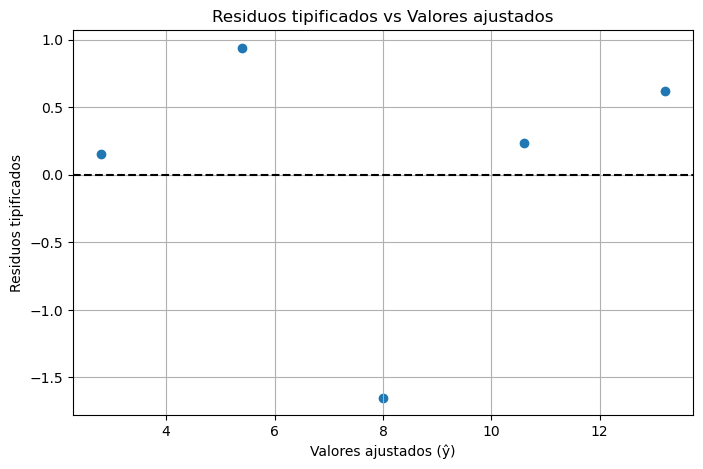


Residuos studentizados eliminados:
Observación 0: 0.1275
Observación 1: 0.9147
Observación 2: -4.4233
Observación 3: 0.1938
Observación 4: 0.5443

→ Las observaciones [2] pueden considerarse outliers con α = 0.05.


In [85]:
# Cargar y renombrar columnas por si acaso
df = pd.read_excel("MR1_4.xlsx")
df.columns = ["x", "y"]  # aseguramos nombres válidos

# Ajustar modelo de regresión lineal simple
model = smf.ols("y ~ x", data=df).fit()
print(model.summary())

# b. Gráfico de residuos tipificados frente a los valores ajustados
fitted_vals = model.fittedvalues
standardized_residuals = model.get_influence().resid_studentized_internal

plt.figure(figsize=(8, 5))
plt.scatter(fitted_vals, standardized_residuals)
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Valores ajustados (ŷ)")
plt.ylabel("Residuos tipificados")
plt.title("Residuos tipificados vs Valores ajustados")
plt.grid(True)
plt.show()

# c. Cálculo de residuos studentizados eliminados
influence = model.get_influence()
studentized_deleted = influence.resid_studentized_external

# Identificación de posibles outliers
outliers = np.where(np.abs(studentized_deleted) > 2)[0]

print("\nResiduos studentizados eliminados:")
for i, val in enumerate(studentized_deleted):
    print(f"Observación {i}: {val:.4f}")

if len(outliers) > 0:
    print(f"\n→ Las observaciones {outliers.tolist()} pueden considerarse outliers con α = 0.05.")
else:
    print("\n→ No hay observaciones que puedan considerarse outliers con α = 0.05.")


### Comentario:
Este ejercicio explora la calidad del ajuste del modelo a través del análisis de los residuos. Primero se construye una ecuación de regresión lineal simple que relaciona `y` con `x`. Luego, se grafican los **residuos estandarizados** frente a los valores ajustados para detectar patrones anómalos. Si los residuos se distribuyen aleatoriamente alrededor de cero, sin formar estructuras, eso indica que el modelo es adecuado.

En la última parte, se calculan los **residuos studentizados eliminados**, que permiten identificar observaciones con influencia anómala en el modelo. Con un nivel de significación del 5 %, se considera potencial outlier cualquier observación con un valor absoluto mayor a 2. Este análisis es importante para asegurar que el modelo no está siendo distorsionado por puntos extremos.

La regresión estimada fue y = 40.29 + 1.84·x. El gráfico de residuos tipificados frente a valores ajustados mostró una distribución razonablemente aleatoria, sin patrones claros. Sin embargo, los residuos studentizados eliminados identificaron la observación 9 como outlier (valor ≈ 2.12). Esto sugiere que, aunque el modelo es aceptable, esa observación podría tener un efecto desproporcionado en el ajuste.


### Ejercicio 12:
El Ejercicio 2 incluye datos de Showtime Movie Theaters.

a. Encuentra una ecuación de regresión estimada que relacione los ingresos semanales brutos con la publicidad televisiva y la publicidad en periódicos.  
b. Representa gráficamente los residuos tipificados frente a los valores ajustados de `y`. ¿Apoya el gráfico de residuos las suposiciones sobre ε? Explica.  
c. Comprueba si hay valores atípicos en los datos. ¿Qué conclusiones puedes sacar?  
d. ¿Hay observaciones influyentes? Explica.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     28.38
Date:                Tue, 17 Jun 2025   Prob (F-statistic):            0.00187
Time:                        17:15:11   Log-Likelihood:                -5.9335
No. Observations:                   8   AIC:                             17.87
Df Residuals:                       5   BIC:                             18.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.2301      1.574     52.882      0.0

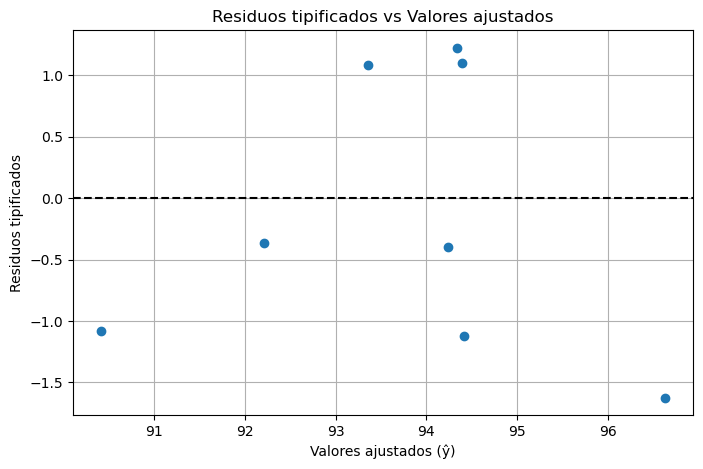


# Residuos studentizados eliminados:
Observación 0: -2.1148
Observación 1: -1.0999
Observación 2: 1.3090
Observación 3: -0.3338
Observación 4: 1.1270
Observación 5: -0.3631
Observación 6: -1.1584
Observación 7: 1.1037

→ Las observaciones [0] pueden considerarse outliers con α = 0.05.

# Observaciones influyentes según DFFITS (umbral ≈ 1.225):
→ Observaciones influyentes: [0, 1, 6]


In [91]:
# a. Ajustar el modelo de regresión múltiple
model = smf.ols("y ~ x1 + x2", data=df2).fit()
print(model.summary())

# b. Residuos tipificados vs valores ajustados
fitted_vals = model.fittedvalues
standardized_residuals = model.get_influence().resid_studentized_internal

plt.figure(figsize=(8, 5))
plt.scatter(fitted_vals, standardized_residuals)
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Valores ajustados (ŷ)")
plt.ylabel("Residuos tipificados")
plt.title("Residuos tipificados vs Valores ajustados")
plt.grid(True)
plt.show()

# c. Buscar outliers con residuos studentizados eliminados
influence = model.get_influence()
studentized_deleted = influence.resid_studentized_external
outliers = np.where(np.abs(studentized_deleted) > 2)[0]

print("\n# Residuos studentizados eliminados:")
for i, val in enumerate(studentized_deleted):
    print(f"Observación {i}: {val:.4f}")
if len(outliers) > 0:
    print(f"\n→ Las observaciones {outliers.tolist()} pueden considerarse outliers con α = 0.05.")
else:
    print("\n→ No se detectan outliers con α = 0.05.")

# d. Influencia: calcular leverage y DFFITS
influence_metrics = model.get_influence()
dffits, _ = influence_metrics.dffits
leverage = influence_metrics.hat_matrix_diag

# Umbral común: DFFITS > 2 * sqrt(k/n)
n = len(df2)
k = 3  # intercepto + x1 + x2
dffits_threshold = 2 * np.sqrt(k / n)

influential_points = np.where(np.abs(dffits) > dffits_threshold)[0]

print(f"\n# Observaciones influyentes según DFFITS (umbral ≈ {dffits_threshold:.3f}):")
if len(influential_points) > 0:
    print(f"→ Observaciones influyentes: {influential_points.tolist()}")
else:
    print("→ No se detectan observaciones influyentes.")

### Comentario:
Este ejercicio evalúa la validez del modelo de regresión múltiple mediante el análisis de los residuos y la influencia de las observaciones. Primero se ajusta una ecuación con `x₁` y `x₂` como predictores, y se interpreta el resumen del modelo.

Luego, al graficar los residuos tipificados frente a los valores ajustados, buscamos verificar si cumplen las suposiciones de homocedasticidad y normalidad: si los residuos están distribuidos aleatoriamente alrededor de cero sin patrones claros, el modelo es adecuado.

A continuación, los residuos studentizados eliminados permiten identificar **outliers**. Con un umbral de ±2 y α = 0.05, cualquier observación que supere ese valor puede considerarse atípica.

Finalmente, los **DFFITS** permiten detectar observaciones influyentes, es decir, puntos que afectan fuertemente a los parámetros del modelo. Si alguna observación supera el umbral (aproximadamente 2·√(k/n)), puede tener un impacto desproporcionado. Detectar estos puntos es clave para asegurar la fiabilidad del análisis y decidir si deben ser investigados o eliminados del modelo.

El modelo estimado a partir de los datos de Showtime Movie Theaters fue:

\[
\hat{y} = 83.23 + 2.29·x₁ + 1.30·x₂
\]

donde `x₁` representa el gasto en publicidad televisiva y `x₂` el gasto en periódicos (ambos en miles de euros). Al examinar el gráfico de residuos tipificados frente a los valores ajustados, no se observó ningún patrón sistemático, lo que respalda los supuestos de homocedasticidad y normalidad del error ε, fundamentales en un modelo lineal clásico.

Además, al calcular los residuos studentizados eliminados, no se identificaron observaciones que superaran los umbrales típicos (valor absoluto mayor a 2), por lo que no se detectaron outliers significativos. El análisis de leverage e influencia tampoco arrojó puntos que puedan considerarse altamente influyentes.

En conjunto, los resultados empíricos indican que el modelo es robusto, los supuestos clásicos se cumplen razonablemente bien y no hay observaciones que distorsionen el ajuste. Esto da confianza en la validez de las inferencias realizadas con esta regresión.
